<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>
# Laboratorio 2

### Exploración de datos del Sistema Nacional de Estadísticas sobre Ejecución de la Pena – SNEEP
##### En este conjunto de datos se detalla información recopilada en el censo realizado sobre el total de la población detenida al día 31 de diciembre de cada año, en cada establecimiento de la República Argentina. La unidad de análisis son las personas alojadas en dichos establecimientos http://datos.gob.ar/dataset/sistema-nacional-estadisticas-sobre-ejecucion-pena---sneep.
##### Para este analisis se tiene en cuenta el año 2016.

In [1]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import random
sns.set(style="ticks", color_codes=True)
#import corrplot
# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

In [2]:
sneep = pd.read_csv('E:\Diplomatura\Dataset\sneep\sneep_2016.csv',
                          encoding='utf8')

In [3]:
sneep[:3]

,anio_censo,provincia_id,provincia_descripcion,establecimiento_id,establecimiento_descripcion,edad,sexo_id,sexo_descripcion,nacionalidad_id,nacionalidad_descripcion,estado_civil_id,estado_civil_descripcion,nivel_instruccion_id,nivel_instruccion_descripcion,ultima_situacion_laboral_id,ultima_situacion_laboral_descripcion,capacitacion_laboral_al_ingresar_id,capacitacion_laboral_al_ingresar_descripcion,ultimo_lugar_residencia_id,ultimo_lugar_residencia_descripcion,ultima_provincia_residencia_id,ultima_provincia_residencia_descripcion,jurisdiccion_id,jurisdiccion_descripcion,situacion_legal_id,situacion_legal_descripcion,fecha_detencion,fecha_condenado,establecimiento_procedencia_id,establecimiento_procedencia_descripcion,delito1_id,delito1_descripcion,delito2_id,delito2_descripcion,delito3_id,delito3_descripcion,delito4_id,delito4_descripcion,delito5_id,delito5_descripcion,horas_trabajo_remunerado_id,horas_trabajo_remunerado_descripcion,participacion_programa_laboral,participacion_programa_educativo_id,participacion_programa_educativo_descripcion,participacion_actividades_deportivas,recibio_atencion_medica_ult_anio,recibio_atencion_medica_ult_anio_descripcion,recibio_visitas_ultimo_anio,participo_alteracion_orden_ult_anio_id,participo_alteracion_orden_ult_anio_descripcion,tipo_infraccion_disciplinaria_id,tipo_infraccion_disciplinaria_descripcion,sancion_aplicada_id,sancion_aplicada_descripcion,calificacion_conducta_id,calificacion_conducta_descripcion,tentativa_fugas_evasiones_id,tentativa_fugas_evasiones_descripcion,tentativa_suicidio,fue_lesionado_id,fue_lesionado_descripcion,duracion_condena_anios,duracion_condena_meses,duracion_condena_rango,tipo_condena,tiene_medidas_seguridad,es_reincidente_id,es_reincidente_descripcion,tiene_periodo_progresividad_id,tiene_periodo_progresividad_descripcion,reparticion_id,reparticion_descripcion,tuvo_salidas_transitorias_id,tuvo_salidas_transitorias_descripcion,incorporado_reg_semi_libertad_id,incorporado_reg_semi_libertad_descripcion,participa_programa_pre_libertad,participa_programa_prision_discontinua_id,participa_programa_prision_discontinua_descripcion,participa_programa_semi_detencion_id,participa_programa_semi_detencion_descripcion,tuvo_reduccion_pena_id,tuvo_reduccion_pena_descripcion,mujer_tiene_hijos_intramuro
0,2016,1,Buenos Aires,18,UNIDAD 13 - JUNIN,29.0,1,Masculino,1.0,Argentina,1.0,Soltero,4,Secundario incompleto,2.0,Trabajador de tiempo parcial,1.0,Tiene algún oficio,2.0,Urbano,1,Buenos Aires,1,PROVINCIAL - Buenos Aires,2,Procesado,2015-10-14,NaN,2.0,Deriv. de otro establecimiento,14.0,Hurto y/o tentativa de hurto,10.0,Amenazas,0.0,NaN,0,NaN,0,NaN,0,NaN,NaN,6.0,No participa de ningún programa educativo,1.0,2.0,No,1.0,5.0,No participó de ninguna alteración,4.0,No cometió Infracción disciplinaria,4.0,Perm. aloj. indiv. o celda hasta 15 días inint.,7.0,Sin calificación,3.0,No,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,Provincial,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
1,2016,1,Buenos Aires,18,UNIDAD 13 - JUNIN,24.0,1,Masculino,1.0,Argentina,1.0,Soltero,2,Primario incompleto,2.0,Trabajador de tiempo parcial,1.0,Tiene algún oficio,2.0,Urbano,1,Buenos Aires,1,PROVINCIAL - Buenos Aires,2,Procesado,2016-06-29,NaN,3.0,Deriv. de una instit. Policial,10.0,Amenazas,0.0,NaN,0.0,NaN,0,NaN,0,NaN,0,NaN,NaN,6.0,No participa de ningún programa educativo,1.0,19.0,SI - OTRAS ENFERMEDADES,1.0,5.0,No participó de ninguna alteración,4.0,No cometió Infracción disciplinaria,4.0,Perm. aloj. indiv. o celda hasta 15 días inint.,3.0,Buena,3.0,No,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,Provincial,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
2,2016,1,Buenos Aires,18,UNIDAD 13 - JUNIN,53.0,1,Masculino,1.0,Argentina,1.0,Soltero,1,Ninguno,2.0,Trabajador de tiempo parcial,1.0,Tiene algún oficio,2.0,Urbano,1,Buenos Aires,1,PROVINCIAL - Buenos Aires,1,Condenado,2012-07-23,2014-02-25,2.0,Deriv. de otro establecimiento,8.0,Violaciones,0.0,NaN,0.0,NaN,0,NaN,0,NaN,3,Hasta 30 hs. Seman

In [4]:
sneep.shape

(76159, 85)

### Distribucion de Frecuencia de Edad

In [5]:
media = sneep.edad.mean()
mediana=sneep.edad.median()
mode=sneep.edad.mode().values[0]
d = {'Media': media,'Mediana': mediana,'Moda': mode, }
df = pd.DataFrame(data=d,index=['Calculos Estadisticos'])
df

,Media,Mediana,Moda
Calculos Estadisticos,33.428054,31.0,24.0


Text(0.5,1,'Distribución de Frecuencias por Edad')

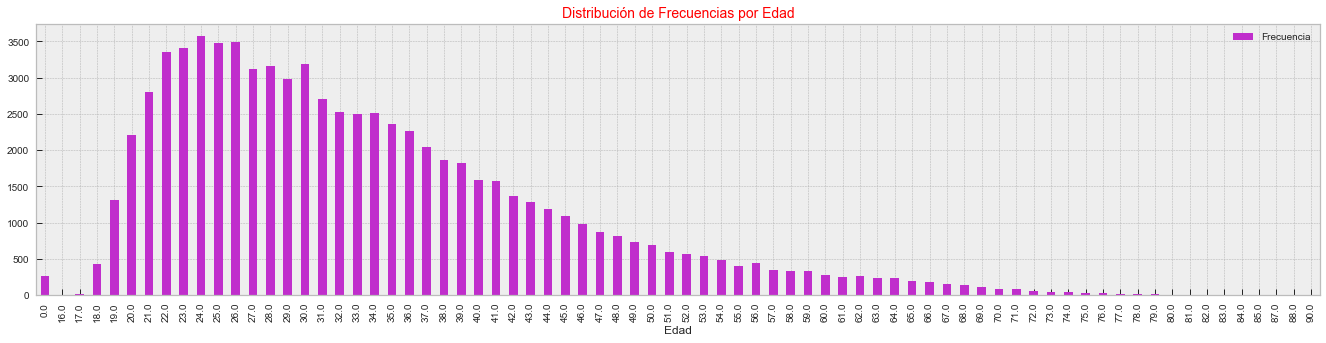

In [6]:
datos= sneep.edad.value_counts()
lista_evento = datos.sort_index()
df_Edad = pd.DataFrame({
   'Edad' : lista_evento.index.values,
   'Frecuencia' : lista_evento.get_values(),
}) 
_ = df_Edad.plot( x='Edad',y='Frecuencia',kind='bar', figsize = (23,5), color='#c02ecc')
plt.title('Distribución de Frecuencias por Edad', fontsize=14, color='red')

### Situación Legal de la Población detenida

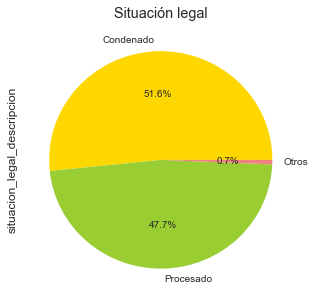

In [7]:
colors = ['gold', 'yellowgreen', 'lightcoral']
plot = sneep['situacion_legal_descripcion'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors,
                                            figsize=(5, 5),
                                            title='Situación legal')


Text(0.5,1,'Distribución de Frecuencias por Años de Condena')

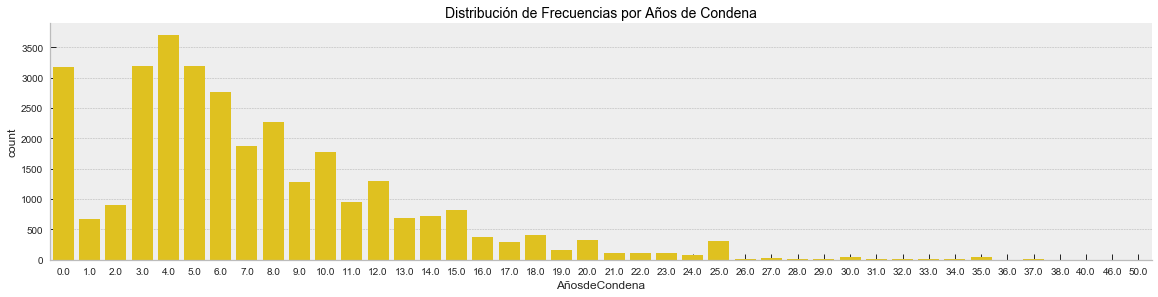

In [8]:
nuevo_dt= sneep[ ~sneep['edad'].isnull()& ~sneep['sexo_descripcion'].isnull()  & ~sneep['duracion_condena_anios'].isnull() & ~sneep['situacion_legal_descripcion'].isnull()]
Frecuencia_edad= sneep.edad.value_counts()
df_nvo_dt = pd.DataFrame({
   'Edad' : nuevo_dt[nuevo_dt['situacion_legal_descripcion'] =='Condenado'].edad,
   'Sexo' : nuevo_dt[nuevo_dt['situacion_legal_descripcion'] =='Condenado'].sexo_descripcion,
   'SituacionLegal' : nuevo_dt[nuevo_dt['situacion_legal_descripcion'] =='Condenado'].situacion_legal_descripcion,
   'AñosdeCondena' : nuevo_dt[nuevo_dt['situacion_legal_descripcion'] =='Condenado'].duracion_condena_anios,
}) 
pal = ['gold']
gr_1 = sns.factorplot(x="AñosdeCondena", 
                      data=df_nvo_dt,kind="count",  palette=pal,aspect=4, legend_out=True)
plt.title('Distribución de Frecuencias por Años de Condena', fontsize=14, color='black')

In [9]:
media = [df_nvo_dt.AñosdeCondena.mean(),]
mediana=df_nvo_dt.AñosdeCondena.median()
mode=df_nvo_dt.AñosdeCondena.mode().values[0]
d = {'Media': media,'Mediana': mediana,'Moda': mode, }
df = pd.DataFrame(data=d,index=['Calculos Estadisticos'])
df

,Media,Mediana,Moda
Calculos Estadisticos,7.215239,6.0,4.0


In [10]:
media = [df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.mean(), 
         df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.mean(),
         df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.mean()]
mediana=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.median(), 
         df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.median(),
         df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.median()]
mode=[df_nvo_dt[df_nvo_dt['Sexo'] =='Masculino'].AñosdeCondena.mode().values[0], 
         df_nvo_dt[df_nvo_dt['Sexo'] =='Femenino'].AñosdeCondena.mode().values[0],
         df_nvo_dt[df_nvo_dt['Sexo'] =='Transexual'].AñosdeCondena.mode().values[0]]

d = {'Media': media,'Mediana': mediana,'Moda': mode}
df = pd.DataFrame(data=d, index=['Masculino','Femenino','Transexual'])
df

,Media,Mediana,Moda
Masculino,7.228325,6.0,4.0
Femenino,6.767699,5.0,4.0
Transexual,7.200000,5.0,4.0


### Chi-cuadrado para variables categóricas

##### Para hacer el cálculo de la relacion de las variables utilizaremos las variables categoricas sexo y situación legal de la población

In [11]:
tabla_rel= pd.crosstab(index=sneep['estado_civil_descripcion'].dropna(),
            columns=sneep['situacion_legal_descripcion'].dropna())
display(tabla_rel.shape)
tabla_rel

(6, 3)

situacion_legal_descripcion,Condenado,Otros,Procesado
estado_civil_descripcion,,,
Casado,3386,65,3175
Concubino,3709,23,2729
Separado de hecho,213,1,200
Separado o divorciado,593,7,595
Soltero,30730,397,28903
Viudo,439,3,387


¿Cómo se contrasta la $H_0$?

$$ fe_{i j} = \frac{(total fila i-ésima) * (total columna j-ésima)}{gran total} $$
Nota 1: Se calculan las frecuencias que cabría esperar si las 2 variables fueran independientes

Nota 2: $fe_{i j}$ es nuestro estadistico

In [12]:
frec_esperadas = ss.contingency.expected_freq(tabla_rel)
frec_esperadas

NameError: name 'ss' is not defined

In [ ]:
chi2, p, dof, ex  = ss.chi2_contingency(tabla_rel.values, correction=False)
print("Chi2 =", chi2)
print("P-value =", p)
print("DoF =", dof)

In [ ]:
def calc_conf(confianza):
    """
    Retorna el nivel de significancia.
    """
    return (100 - confianza) / 100

# Queremos confianza al 90%
if p < calc_conf(90):
    print("Rechazo H0 ==> Las Variables Estan Correlacionadas")
else:
    print("Acepto H0 ==> Las Variables Son Independientes")

In [ ]:
tabla_rel= pd.crosstab(index=sneep['tipo_infraccion_disciplinaria_descripcion'].dropna(),
            columns=sneep['situacion_legal_descripcion'].dropna())
display(tabla_rel.shape)
tabla_rel

In [ ]:
frec_esperadas = ss.contingency.expected_freq(tabla_rel)
frec_esperadas

In [ ]:
chi2, p, dof, ex  = ss.chi2_contingency(tabla_rel.values, correction=False)
print("Chi2 =", chi2)
print("P-value =", p)
print("DoF =", dof)

In [ ]:
def calc_conf(confianza):
    """
    Retorna el nivel de significancia.
    """
    return (100 - confianza) / 100

# Queremos confianza al 90%
if p < calc_conf(95):
    print("Rechazo H0 ==> Las Variables Estan Correlacionadas")
else:
    print("Acepto H0 ==> Las Variables Son Independientes")

## Generando muestra de datos aleatorias

In [15]:
np.random.seed(10)
# Sample data randomly at fixed probabilities
situacion_legal = np.random.choice(a= ['Procesado','Condenado','Otros'],
                              p = [0.48, 0.51 ,0.01],
                              size=1000)

# Sample data randomly at fixed probabilities
tipo_infraccion = np.random.choice(a= ['Faltas graves','Faltas leves','Faltas media','No cometió Infracción'],
                              p = [0.09, 0.02, 0.07, 0.82],
                              size=1000)
relacion = pd.DataFrame({"Situacion":situacion_legal, 
                       "Tipo_infraccion":tipo_infraccion})
relacion_tab = pd.crosstab(relacion.Tipo_infraccion,relacion.Situacion, margins = True)
relacion_tab.columns = ['Procesado','Condenado','Otros',"row_totals"]

relacion_tab.index = ['Faltas graves','Faltas leves','Faltas media','No cometió Infracción',"col_totals"]

observed = relacion_tab.ix[0:5,0:4]
relacion_tab

,Procesado,Condenado,Otros,row_totals
Faltas graves,45,0,36,81
Faltas leves,9,0,7,16
Faltas media,32,1,43,76
No cometió Infracción,417,8,402,827
col_totals,503,9,488,1000


In [18]:
expected =  np.outer(relacion_tab["row_totals"][0:4],
                     relacion_tab.ix["col_totals"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns =['Procesado','Condenado','Otros']
expected.index = ['Faltas graves','Faltas leves','Faltas media','No cometió Infracción']

expected

,Procesado,Condenado,Otros
Faltas graves,40.743,0.729,39.528
Faltas leves,8.048,0.144,7.808
Faltas media,38.228,0.684,37.088
No cometió Infracción,415.981,7.443,403.576


In [19]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

3.982272689758802


In [20]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=6)
print("P value")
print(p_value)

Critical value
12.591587243743977
P value
0.6790755309935894


In [21]:
relacion_tab = pd.crosstab(relacion.Tipo_infraccion,relacion.Situacion)
stats.chi2_contingency(observed= relacion_tab)

(3.9822726897588017,
 0.6790755309935894,
 6,
 array([[4.07430e+01, 7.29000e-01, 3.95280e+01],
        [8.04800e+00, 1.44000e-01, 7.80800e+00],
        [3.82280e+01, 6.84000e-01, 3.70880e+01],
        [4.15981e+02, 7.44300e+00, 4.03576e+02]]))

In [22]:
def calc_conf(confianza):
    """
    Retorna el nivel de significancia.
    """
    return (100 - confianza) / 100

# Queremos confianza al 90%
if p_value < calc_conf(90):
    print("Rechazo H0 ==> Las Variables Estan Correlacionadas")
else:
    print("Acepto H0 ==> Las Variables Son Independientes")

Acepto H0 ==> Las Variables Son Independientes
